<a href="https://colab.research.google.com/github/Abdelmenam-Tarek-Abdelmenam/Face-mask_detection/blob/main/mask_detection_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packeges

In [31]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline  


# Initial variable



In [32]:
dirveLinkBase = r"drive/MyDrive/"
colabLinkBase = dirveLinkBase + "Colab Notebooks/";
faceDetector = cv.CascadeClassifier(colabLinkBase + "haarcascade_frontalface_default.xml")
maskModel = load_model(colabLinkBase + "mask_detector.model")

# Helper functions

In [33]:
def showImg(img):
  plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

# detection function

In [34]:
def detect_and_predict_mask(frame ):
  (h, w) = frame.shape[:2]
  facesPred = faceDetector.detectMultiScale(frame,1.3,5)
  
  faces = []
  preds = []
  locs = []  

  for (startX,startY,widht,hieght) in facesPred :
        endX = startX + widht
        endY = startY + hieght
    
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

        face = frame[startY:endY, startX:endX]
        face = cv.cvtColor(face, cv.COLOR_BGR2RGB)
        face = cv.resize(face, (224, 224))
        face = img_to_array(face)
        face = preprocess_input(face)

        faces.append(face)
        locs.append((startX, startY, endX, endY))

        if len(faces) > 0:
            faces = np.array(faces, dtype="float32")
            preds = maskModel.predict(faces, batch_size=32)

  return (locs, preds)


# Detect face

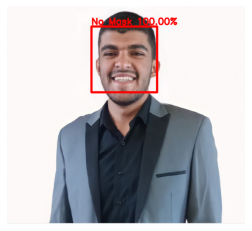

In [38]:
# read the imag
frame = cv.imread(dirveLinkBase + "PicsArt_07-31-07.48.42 (1).jpg")

# detect face 
(locs, preds) = detect_and_predict_mask(frame)

for (box, pred) in zip(locs, preds):
		(startX, startY, endX, endY) = box
		(mask, withoutMask) = pred

		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

		label = "{} {:.2f}%".format(label, max(mask, withoutMask) * 100)

		cv.putText(frame, label, (startX, startY - 10),
		cv.FONT_HERSHEY_SIMPLEX,1.5, color, 5)
		cv.rectangle(frame, (startX, startY), (endX, endY), color, 10)

showImg(frame)